In [25]:
from numpy.random import normal
import matplotlib.pyplot as plt

['dJobOpenings.csv', 'dJobSatisfaction_GSS.csv', 'dJobZone.csv', 'dKnowledge.csv', 'dLevelOfCompetition.csv', 'dPayScale.csv', 'dPrestige.csv', 'dRiskOfAutomation.csv', 'dSkill.csv', 'dWage_BLS.csv', 'Prestige_clean.csv']


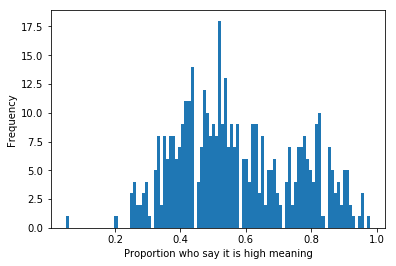

In [26]:
import pandas as pd

payscale_df = pd.read_csv('data/01 - cleaned data/dPayScale.csv')
plt.hist(payscale_df['High Meaning'], bins=100)
plt.xlabel("Proportion who say it is high meaning")
plt.ylabel("Frequency")
plt.show()

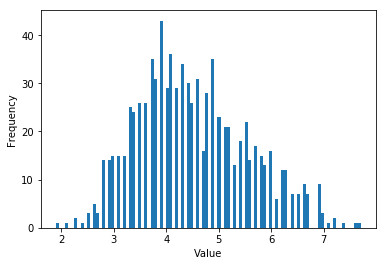

In [10]:
prestige_df = pd.read_csv('data/01 - cleaned data/dPrestige.csv')
prestige_df.rename(columns = {'Mean': 'Prestige'}, inplace=True)
prestige_df['SOC code'] = prestige_df['SOC code'].map(lambda SOC_code: str(SOC_code) + '.00')
prestige_df.sort_values(['Prestige'], ascending=False)

plt.hist(prestige_df['Prestige'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

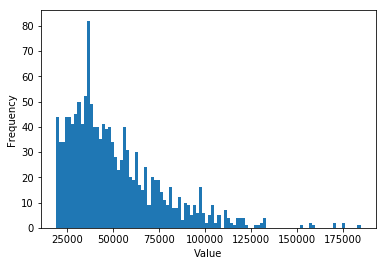

In [11]:
wage_df = pd.read_csv('data/01 - cleaned data/dWage_BLS.csv')
wage_df['SOC code'] = wage_df['SOC code'].map(lambda SOC_code: str(SOC_code) + '.00')

plt.hist(wage_df['Wage_BLS'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

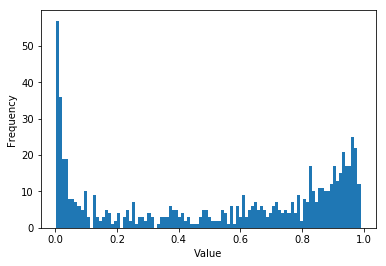

In [12]:
automation_risk_df = pd.read_csv('data/01 - cleaned data/dRiskOfAutomation.csv')
automation_risk_df['SOC code'] = automation_risk_df['SOC code'].map(lambda SOC_code: str(SOC_code) + '.00')

plt.hist(automation_risk_df['RiskOfAutomation'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

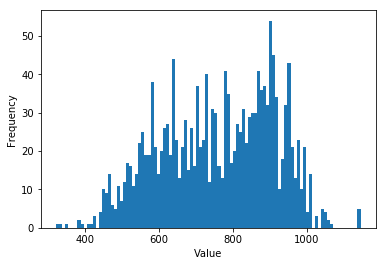

In [13]:
skills_df = pd.read_csv('data/04 - occupation scores inferred from skill/score_Occupation_infered from skills.csv')
skills_df.rename(columns = {'SOC code (occupation label)': 'SOC code'}, inplace=True)
skills_df.rename(columns = {'score (mean of the 4)': 'skill_score'}, inplace=True)

plt.hist(skills_df['skill_score'], bins=100)
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [14]:
soc_name_df = pd.read_csv('data/00/All_Career_Clusters.csv')
soc_name_df.rename(columns = {'Code': 'SOC code'}, inplace=True)

In [16]:
# High meaning, bls wage, prestige, outlook, time to enter

aggregate_df = (wage_df.merge(payscale_df,  on='SOC code')
    .merge(soc_name_df, on='SOC code')
    .merge(prestige_df, on='SOC code')
    .merge(automation_risk_df, on='SOC code')
    .merge(skills_df, on='SOC code')
    .drop_duplicates(subset='Occupation_y') # TODO: Why is this necessary?
    [['SOC code', 'Occupation_x', 'Occupation_y', 'Wage_BLS', 'High Meaning', 'Prestige', 'RiskOfAutomation', 'skill_score']])

from ipywidgets import *
from IPython.display import display

def filter_jobs(aggregate_df, meaning, prestige, automation_risk, wage, skill_score):
    return aggregate_df[
        (aggregate_df['High Meaning'] >= meaning) & 
        (aggregate_df['Prestige'] >= prestige) & 
        (aggregate_df['RiskOfAutomation'] <= automation_risk) &
        (aggregate_df['Wage_BLS'] >= wage) &
        (aggregate_df['skill_score'] >= skill_score)
    ]

def on_change(meaning, prestige, automation_risk, wage, skill_score):
    jobs = filter_jobs(aggregate_df, meaning, prestige, automation_risk, wage, skill_score)
    number_of_jobs = jobs['SOC code'].count()
    display("Number of jobs found: {}".format(number_of_jobs))
    display(jobs)

slider_widget = interactive(
    on_change,
    meaning=FloatSlider(min=0.0, max=1.0, value=0.7),
    prestige=FloatSlider(min=0.0, max=8.0, value=5),
    automation_risk=FloatSlider(min=0.0, max=1.0, value=0.3),
    wage=IntSlider(min=0, max=200000, step=10000, value=50000),
    skill_score=IntSlider(min=0, max=1200))

display(slider_widget)


'Number of jobs found: 24'

,SOC code,Occupation_x,Occupation_y,Wage_BLS,High Meaning,Prestige,RiskOfAutomation,skill_score
0,11-1011.00,Chief Executives,business entrepreneur,175110,0.74,5.8,0.0150,1145.386995
5,11-1011.00,Chief Executives,college or university president,175110,0.74,7.1,0.0150,1145.386995
10,11-1011.00,Chief Executives,department head in a state government,175110,0.74,6.6,0.0150,1145.386995
15,11-1011.00,Chief Executives,mayor of a large city,175110,0.74,7.2,0.0150,1145.386995
20,11-1011.00,Chief Executives,member of the board of directors of a large co...,175110,0.74,6.9,0.0150,1145.386995
25,11-1011.00,Chief Executives,owner of a computer software company,175110,0.74,6.2,0.0150,1145.386995
389,11-9111.00,Medical and Health Services Managers,hospital administrator,94500,0.84,6.6,0.0073,1053.547817
397,11-9111.00,Medical and Health Services Managers,hospital-admissions officer,94500,0.84,5.6,0.0073,1053.547817
437,11-9121.00,Natural Sciences Managers,agricultural research director,120160,0.77,6.0,0.0180,949.338169
494,11-9151.00,Social and Community Service Managers,manager of united way charity,63530,0.82,5.5,0.0067,1042.759888
